In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

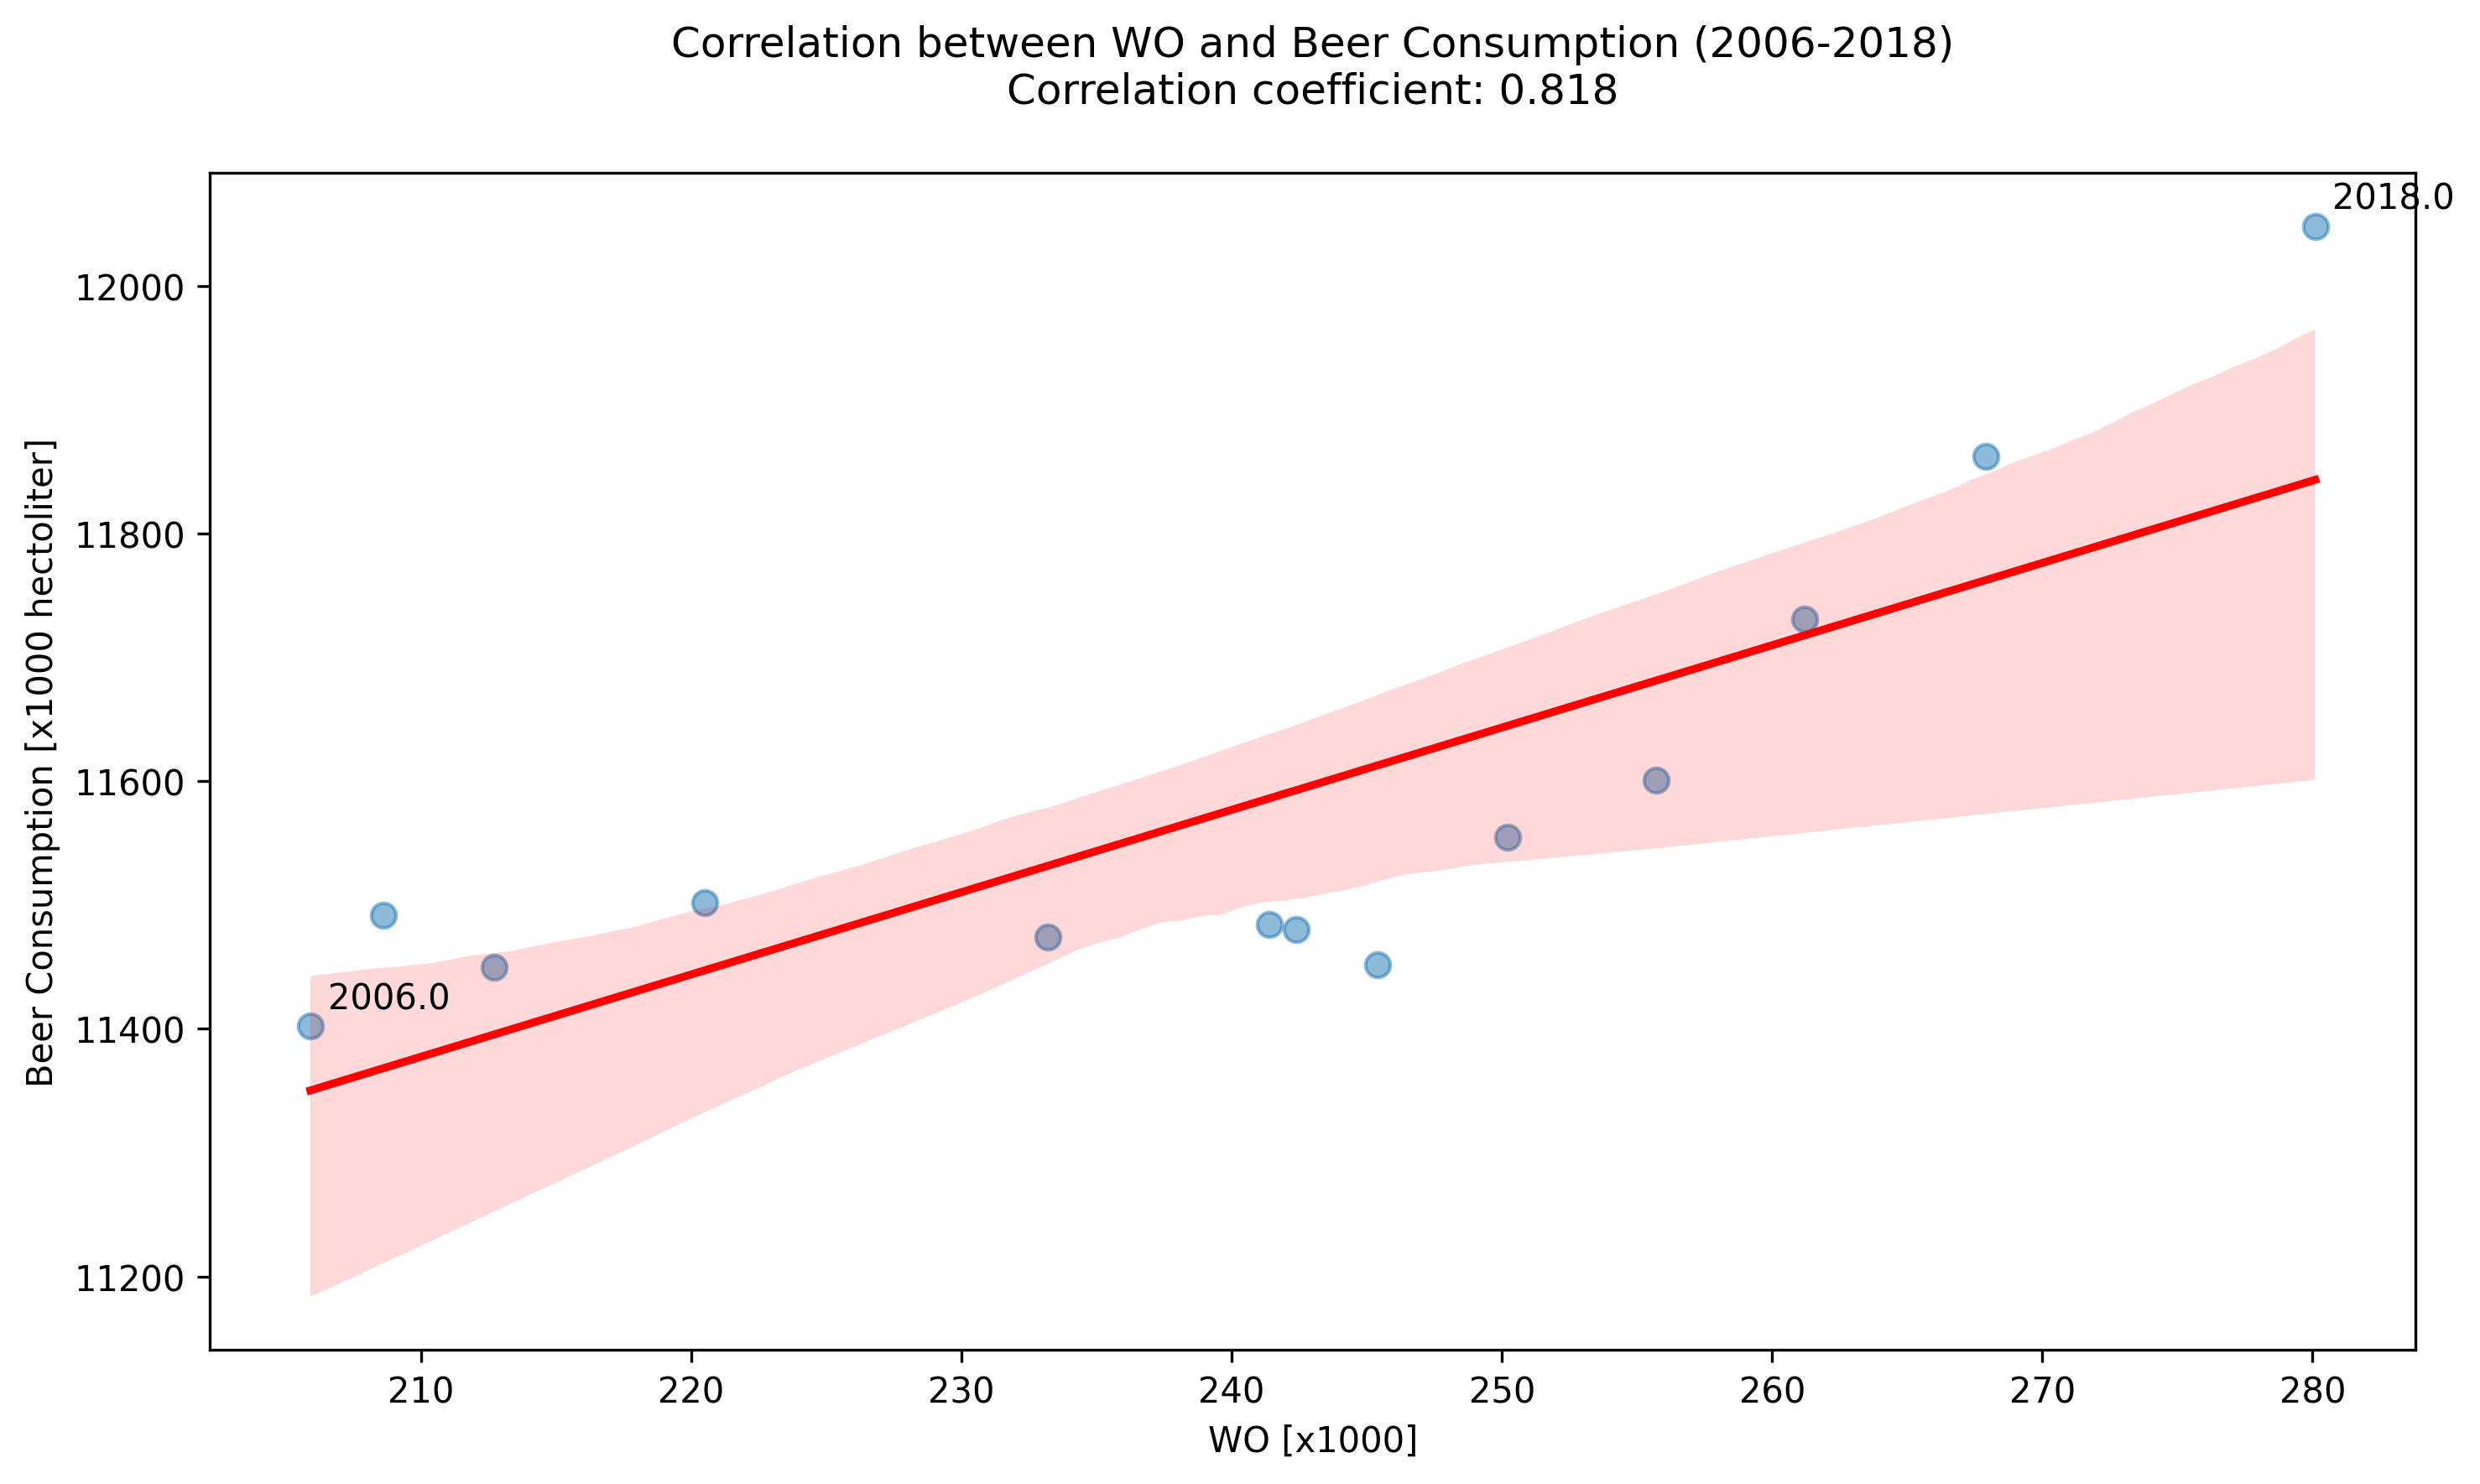

In [17]:
data = pd.read_csv('istherecorrelation.csv', sep=';')
data.columns = ['Year', 'WO', 'Beer']
data['WO'] = data['WO'].str.replace(',', '.').astype(float)

df = data

plt.figure(figsize=(10, 6), dpi=300)

sns.regplot(data=df, x='WO', y='Beer', 
            scatter_kws={'alpha':0.5, 's':50},
            line_kws={'color': 'red'})

correlation = stats.pearsonr(df['WO'], df['Beer'])[0]

plt.title('Correlation between WO and Beer Consumption (2006-2018)\n' + 
          f'Correlation coefficient: {correlation:.3f}', 
          pad=20)
plt.xlabel('WO [x1000]')
plt.ylabel('Beer Consumption [x1000 hectoliter]')

for i, row in df.iterrows():
    if row['Year'] in [2006, 2018]: 
        plt.annotate(str(row['Year']), 
                    (row['WO'], row['Beer']),
                    xytext=(5, 5), 
                    textcoords='offset points')

plt.tight_layout()
plt.savefig('correlation_plot.png', dpi=300, bbox_inches='tight')
plt.show()